# 7- Convolutional Neural Networks

## Great course
- Stanford course: [CS231n Convolutional Neural Networks for Visual Recognition](https://cs231n.github.io/convolutional-networks/)

## LeNet-5 Convolutional Network architecture
![LeNet-5 architecture LeCun et al., 1998](LeNet5.png "LeNet-5 architecture LeCun et al., 1998")  
Reference paper: [Gradient-Based Learning Applied to Document Recognition, LeCun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)

## The Convolution Operation
![The Convolution Operation](ConvolutionOperation.gif)  
Source: [Rob Fergus et al., CVPR2012 Tutorial](https://cs.nyu.edu/~fergus/tutorials/deep_learning_cvpr12/)

In [1]:
# Load the dataset
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [2]:
# Scale images from [0,255] to [0,1]
x_train_normalized = x_train / 255.0

In [7]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib nbagg
# %matplotlib ipympl
# %matplotlib notebook
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

In [4]:
import numpy as np
# Sample a smaller dataset for testing
rand_idx = np.random.choice(x_train.shape[0], 10000)
x_train = x_train_normalized[rand_idx]
y_train = y_train[rand_idx]
x_train.shape

(10000, 28, 28)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 6)         60        
_________________________________________________________________
average_pooling2d_3 (Average (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 16)        880       
_________________________________________________________________
average_pooling2d_4 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               40100     
_________________________________________________________________
dense_5 (Dense)              (None, 80)                8080      
__________

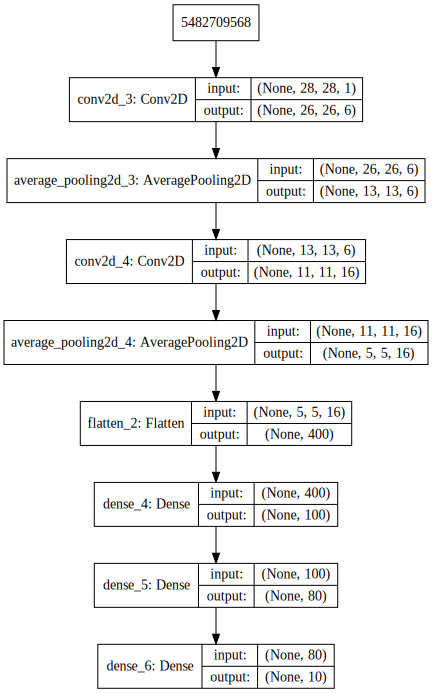

In [8]:
# import tensorflow as tf
import keras
from keras.layers import AveragePooling2D, Conv2D, Dense, Flatten
cnn_model = keras.Sequential()

# First Convolutional Layer
print('** Add your code here **')

# Second Convolutional Layer
print('** Add your code here **')

# First Fully Connected Layer
cnn_model.add(Flatten())
cnn_model.add(Dense(units=100, activation='relu'))

# Second Fully Connected Layer
cnn_model.add(Dense(units=80, activation='relu'))

cnn_model.add(Dense(units=10, activation = 'softmax'))

# Compile the model as a TensorFlow graph
cnn_model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn_model.summary()
SVG(model_to_dot(cnn_model, show_shapes=True).create(prog='dot', format='svg'))

In [9]:
# Using Tensorboard
from time import time
from keras.callbacks import TensorBoard

def tb(logdir="logs", port=6006, open_tab=True, sleep=2):
    import subprocess
    proc = subprocess.Popen(
        "tensorboard --logdir={0} --port={1}".format(logdir, port), shell=True)
    if open_tab:
        import time
        time.sleep(sleep)
        import webbrowser
        webbrowser.open("http://127.0.0.1:{}/".format(port))
    return proc
tb()

In [12]:
tensorboard = TensorBoard(log_dir="logs/{}".format(time()))
history = cnn_model.fit(x_train.reshape((-1, 28, 28, 1)), y_train, validation_split=0.2, epochs=50, shuffle=True, callbacks=[tensorboard], verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 8000 samples, validate on 2000 samples
Epoch 1/50
8000/8000 [==============================] - 2s 268us/step - loss: 0.7755 - acc: 0.7702 - val_loss: 0.3852 - val_acc: 0.8785
Epoch 2/50
8000/8000 [==============================] - 2s 287us/step - loss: 0.2852 - acc: 0.9109 - val_loss: 0.2388 - val_acc: 0.9315
Epoch 3/50
8000/8000 [==============================] - 3s 327us/step - loss: 0.1899 - acc: 0.9406 - val_loss: 0.2014 - val_acc: 0.9400
Epoch 4/50
8000/8000 [==============================] - 2s 310us/step - loss: 0.1361 - acc: 0.9584 - val_loss: 0.1707 - val_acc: 0.9480
Epoch 5/50
8000/8000 [==============================] - 2s 290us/step - loss: 0.1051 - acc: 0.9675 - val_loss: 0.1333 - val_acc: 0.9620
Epoch 6/50
8000/8000 [==============================] - 3s 347us/step - loss: 0.0848 - acc: 0.9730 - val_loss: 0.1205 - val_acc: 0.9660
Epoch 7/50
8000/8000 [==============================] - 3s 382us/step - loss: 0.0731 - a

In [14]:
test_loss, test_acc = cnn_model.evaluate(x_test.reshape((-1, 28, 28, 1)), y_test)
print('Test loss: %0.3f' % test_loss, 'Test accuracy: %0.3f' % test_acc)

10000/10000 [==============================] - 1s 84us/step
Test loss: 0.344 Test accuracy: 0.979


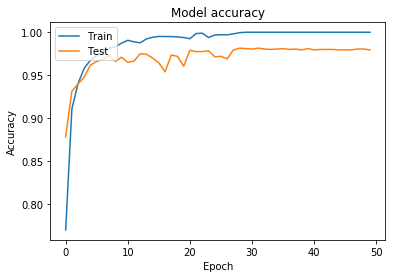

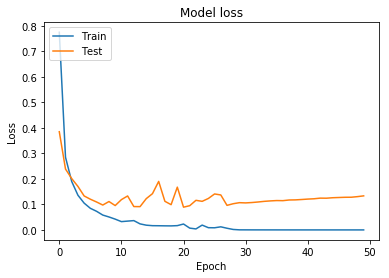

In [15]:
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
plot_training_history(history)

# Going further.. 
- Save and Load your trained model locally
- Implement an Early Stopping [keras.callbacks.EarlyStopping](https://keras.io/callbacks/#earlystopping)  
- Tune Hyperparameters [keras.optimizers](https://keras.io/optimizers/)
- Evaluate more complex/differents network architectures (Dropout is a must)  
  _->Conv2D(filt=32)->Conv2D(filt=64)->Conv2D(filt=128)->MaxPool(2,2)->Dropout(0.25)->Dense(128)->Dropout(0.5)->_
- Data augmentation
- Transfer Learning  
_From a pre-trained VGG16 networks_

# Ressources
- Visualise my ConvNet works: [Andrew Karpathy's ConvNetJS demo on MNIST](https://cs.stanford.edu/people/karpathy/convnetjs/demo/mnist.html)

# 8 - Use your digit classifier!

In [16]:
import cv2
import time

Camera open: True
Frame captured: True


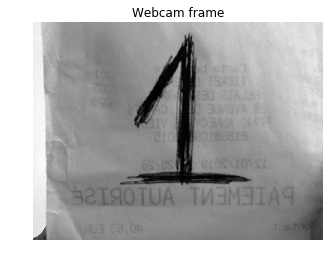

In [18]:
# Capture a frame from Webcam
cam = cv2.VideoCapture(0)
print('Camera open:', cam.isOpened())
cam.set(3, 640)
cam.set(4, 480)
time.sleep(2)  # Wait for the webcam to auto-exposure and white balance
isCaptured, frame = cam.read()
print('Frame captured:', isCaptured)
cam.release()  # Release the camera when the frame is captured

# Plot the captured frame
plt.axis('off')
plt.title('Webcam frame')

frame_grey = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
plt.imshow(frame_grey, cmap=plt.cm.gray, interpolation='nearest')

# frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
# plt.imshow(frame_rgb, cmap=plt.cm.gray, interpolation='nearest')

In [19]:
frame_grey.shape

(480, 640)

(480, 480)


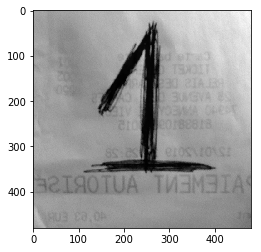

In [20]:
# Crop the frame to a square format
frame_cropped = frame_grey[0:480, 80:560]
print(frame_cropped.shape)
plt.imshow(frame_cropped, cmap=plt.cm.gray, interpolation='nearest')

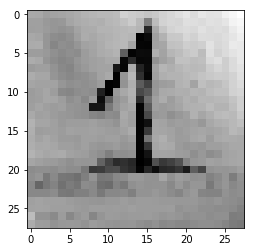

In [21]:
# Resize to (28, 28)
frame_28 = cv2.resize(frame_cropped, dsize=(28, 28), interpolation=cv2.INTER_CUBIC)
plt.imshow(frame_28, cmap=plt.cm.gray, interpolation='nearest')

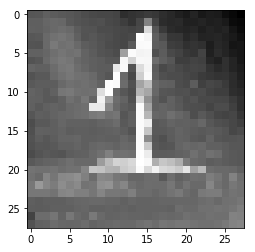

In [22]:
# Inverse and normalize the frame like in the MNIST dataset
frame_28_inv = cv2.bitwise_not(frame_28)
frame_28_norm = frame_28_inv / 255.0
plt.imshow(frame_28_norm, cmap=plt.cm.gray, interpolation='nearest')

In [23]:
y_predicted_proba = cnn_model.predict(frame_28_norm.reshape((-1, 28, 28, 1)), verbose=1)
y_predicted_proba

1/1 [==============================] - 0s 39ms/step


array([[1.9088064e-05, 2.7585734e-04, 8.0542302e-01, 6.0738707e-03,
        1.2500411e-07, 4.2368796e-05, 4.8234921e-07, 1.9978394e-13,
        1.8816522e-01, 4.1521577e-09]], dtype=float32)

In [25]:
# y_predicted_class = keras.np_utils.probas_to_classes(y_predicted_proba)
y_predicted_class = y_predicted_proba.argmax(axis=-1)
y_predicted_class

array([2])